### Multiple Linear Regression

As with linear regression multiple regression can be useful to make a model that predicts a dependent variable using a range of independent variables.

The geometric interpretation for two independent variables and a single dependent variable is a plane through a 3d linear space. The plane doesn't have to pass through the origin, but it should still have a z-axis and z intercept.

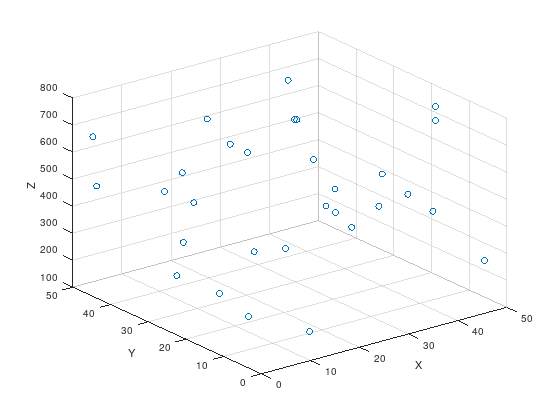

In [1]:
n = 30;

x = randi(50,n,1);
y = randi(50,n,1);
Z = (5*x + 5*y) + randi(500,n,1) ;
#points = randi(10, x)

scatter3(x,y,Z)
xlabel("X");
ylabel("Y");
zlabel("Z");


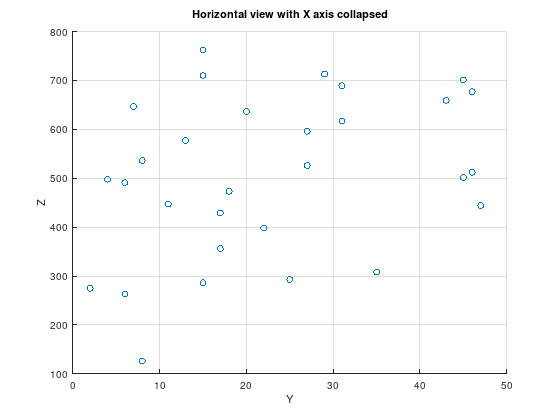

In [2]:
scatter3(x,y,Z)
title("Horizontal view with X axis collapsed")
xlabel("X");
ylabel("Y");
zlabel("Z");
view(90,0)

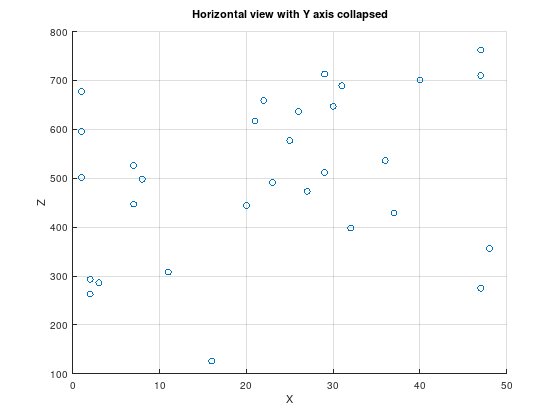

In [3]:
scatter3(x,y,Z)
title("Horizontal view with Y axis collapsed")
xlabel("X");
ylabel("Y");
zlabel("Z");
view(0,0)

With linear regression, you have a single y-intercept and a single slope. With multiple repression, we have a single intercept on the axis of the dependent variable and a slope for every independent variable:

Consider this example in 3d. Let:

$ x, y $ be the independent variables

$ \hat \beta_0 $ be the estimated intercept for z

$ \hat \beta_{1} $ be the estimated slope of x

$ \hat \beta_{2} $ be the estimated slope of y

$ \epsilon $ be the total value of errors, or distance of the plane away from the data

$ \forall z_i \in Z $ :

Where $ z_i $ are the actual observations:

$ z_i = \beta_0 + \beta_{x} x_i + \beta_{y} y_i + \epsilon_i $

We can find the estimates of all $ \beta $ to find an estimate for $ \hat z_i $, which are the predicted values:

$ \hat z_i = \hat \beta_0 + \hat \beta_{x} x_i + \hat \beta_{y} y_i$

$ \epsilon_i = z_i - (\beta_0 + \beta_{x} x_i + \beta_{y} y_i) $

To get the total error, use the sum of squares:

$ \epsilon = \sum \left[ z - (\beta_0 + \beta_{x} x + \beta_{y} y) \right]^2 $


Completing this could use partial derivatives. Learn how to do this with covariance instead, similar to linear regression, because it looks much easier.

### Matrix representation for normal equations solution

Let this be a structural model to represent two independent variables and a dependent variable.

$ z_i = \hat \beta_0 + \hat \beta_1 x_i + \hat \beta_2 y_i + \epsilon_i $

We want to estimate $ \beta_0, \beta_1 and \beta_2 $

Then we can estimate:

$ z_i = \beta_0 + \beta_1 x_i + \beta_2 y_i + \epsilon_i $

It can be useful to represent multiple regression using vectors and a matrix.

let

$ n $ be the number of observations

$ p $ be the number of coefficients to estimate (y intercept and all scalars for independent variables).

$ z = (y_1, y_2, y_3 ... y_n) $ be a vector of all observations of dependent variable $ z $.

$ \beta = (\beta_0, \beta_1, \beta_2 ... \beta_p) $ be the vector of coeffcients to estimate.

$ \epsilon = (\epsilon_1, \epsilon_2 ... \epsilon_n) $ be the errors in the formular for $ z_i $ (not $ \hat z_i $).

$ A $ be a matrix that represents the relationship between all observations (row) to all independent variables. 

$ A = \left[\begin{matrix} 1 & a_{11} & a_{12} & ... & a_{1p} \\ 1 & a_{21} & a_{22}  & ... & a_{2p} \\ ... & ... & ... & ... & ... \\ 1 & a_{n1} & a_{n2} & ... & a_{np} \end{matrix} \right]$

In the specific example of two independent variables, then:

$ A = \left[\begin{matrix} 1 & a_{11} & a_{12} \\ 1 & a_{21} & a_{22} \\ ... & ... & ... \\ 1 & a_{n1} & a_{n2} \end{matrix} \right]$

Now we can represent the linear combination (structural model) as a combination of matrices:

$ A \beta = z $

$ A = \left[\begin{matrix} 1 & a_{11} & a_{12} \\ 1 & a_{21} & a_{22} \\ ... & ... & ... \\ 1 & a_{n1} & a_{n2} \end{matrix} \right]
\left[\begin{matrix} \beta_0 \\ \beta_1 \\ \beta_2 \end{matrix} \right] = 
\left[\begin{matrix} z_1 \\ z_2 \\ ... \\ z_n \end{matrix} \right] 
$

This part is amazing... if you multiply both sides by the transpose of $A$, $A^T$, then this will return a system that we can solve for all of the $ \beta $ values.

$ A^T A \beta = A^T z $

As [this](https://www.youtube.com/watch?v=HY_VtvUKock) video says, $ A^T A $ transforms the $ A $ into a square matrix, with as many columns as rows. This is a linear transformation that projects the space (with as many dimensions as there are variables, in this case 3 $ (x,y,z) $, onto a space with dimensions as there are unknown estimates, in this case 3 $ (\beta_0,\beta_1,\beta_2) $. The result is a square matrix that will allow us to find a unique solution.

In [4]:
### Example

A = [ones(n,1) x y]

A =

    1    1   45
    1   37   17
    1    8    4
    1   21   31
    1   30    7
    1   27   18
    1   47   15
    1   40   45
    1   36    8
    1   16    8
    1    7   11
    1   11   35
    1   23    6
    1    2    6
    1   29   46
    1   25   13
    1   31   31
    1   47   15
    1    1   46
    1   29   29
    1   47    2
    1    7   27
    1   32   22
    1   20   47
    1   22   43
    1    2   25
    1    1   27
    1   26   20
    1    3   15
    1   48   17



In [5]:
### A^T * A
transpose(A)*A

ans =

      30     676     681
     676   22206   14129
     681   14129   21431



In [6]:
### A^T * Z
transpose(A)*Z

ans =

    15146
   362739
   366565



Since

$ A^T A \beta = A^T z$

Then

$ \beta = (A^T A)^{-1} A^T z$

In [7]:
beta = inv(transpose(A)*A) * transpose(A)*Z

### OR
#beta = transpose(A)*A \ transpose(A)*Z

beta =

   313.0849
     3.8779
     4.5991



In [8]:
### Now get the estimates of \hat Z
### This is plotted as a grid, so dim(Z_hat) == 2

beta_0 = beta(1);
beta_1 = beta(2);
beta_2 = beta(3);

xSpace = linspace(0,50,n);
ySpace = linspace(0,50,n);

[xGrid yGrid] = meshgrid(xSpace,ySpace);
zGrid = beta_0 + xGrid*beta_1 + yGrid*beta_2;

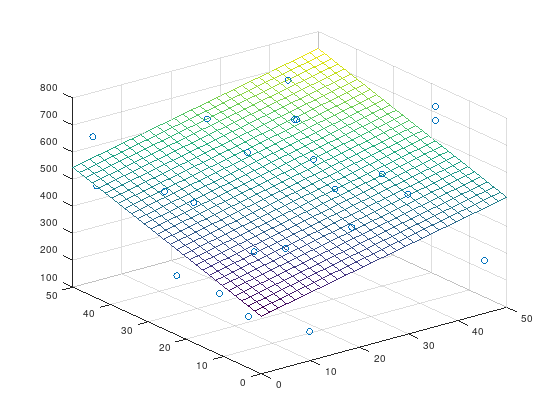

In [9]:
%plot inline

scatter3(x,y,Z)
hold on;
mesh(xGrid, yGrid, zGrid);

In [10]:
%plot gnuplot
# This is run on desktop, to see full 3d space

scatter3(x,y,Z)
hold on;
mesh(xGrid, yGrid, zGrid);